# **minDALL-E**

### Generate images from text prompts using [minDALL-E on Conceptual Captions](https://github.com/kakaobrain/minDALL-E), a model created by Saehoon Kim, Sanghun Cho, Chiheon Kim, Doyup Lee, and Woonhyuk Baek.

This notebook was created by [Eugenio Herrera](https://github.com/ouhenio) after following the advice given by [woctezuma](https://github.com/woctezuma) in [this issue](https://github.com/kakaobrain/minDALL-E/issues/7).


In [1]:
#@markdown #**Install libraries** 🏗️
# @markdown This cell will take a little while because it has to download several libraries.

#@markdown ---

#!git clone https://github.com/kakaobrain/minDALL-E.git
import sys
sys.path.append('./minDALL-E')
#%pip install -q -r minDALL-E/requirements.txt
#%pip install -q pytorch-lightning omegaconf einops tokenizers
#%pip install -q git+https://github.com/openai/CLIP.git
#!pip install torch==1.8.1 torchvision==0.9.1 torchtext==0.9.1 -f https://download.pytorch.org/whl/cu101/torch_stable.html

In [2]:
#@markdown #**Check GPU type** 🕵️
#@markdown ### Factory reset runtime if you don't have the desired GPU.

#@markdown ---




#@markdown V100 = Excellent (*Available only for Colab Pro users*)

#@markdown P100 = Very Good

#@markdown T4 = Good (*preferred*)

#@markdown K80 = Bad

#@markdown P4 = (*Not Recommended*) 

#@markdown ---

!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3090 (UUID: GPU-a33811d9-b913-6443-4a1a-3c0e203bb465)


In [19]:
#@markdown #**Define necessary functions** 🛠️

%cd minDALL-E

import os
import sys
import math
import argparse
import clip
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

output = widgets.Output()
plot_output = widgets.Output()

sys.path.append(os.path.dirname(os.getcwd()))

from dalle.models import Dalle
from dalle.utils.utils import set_seed, clip_score

# device = 'cuda:0'
# model = Dalle.from_pretrained("minDALL-E/1.3B")
# model_clip, preprocess_clip = clip.load("ViT-B/32", device=device)
#
# model_clip.to(device=device)
# model.to(device=device)

def sampling(prompt, top_k, softmax_temperature, seed, num_candidates=96, num_samples_for_display=36):
    # Setup
    n_row = int(math.sqrt(num_samples_for_display))
    n_col = int(math.sqrt(num_samples_for_display))
    set_seed(seed)
    
    # Sampling
    bs = 32
    images = []
    for _ in range(num_candidates // bs):
        images.append( model.sampling(prompt=prompt,
                            top_k=top_k,
                            top_p=None,
                            softmax_temperature=softmax_temperature,
                            num_candidates=bs,
                            device=device).cpu().numpy())

    images = np.concatenate(images, axis=0)
    images = np.transpose(images, (0, 2, 3, 1))

    # CLIP Re-ranking
    rank = clip_score(prompt=prompt, images=images, model_clip=model_clip, preprocess_clip=preprocess_clip, device=device)
    images = images[rank]
    
    images = images[:num_samples_for_display]
    fig = plt.figure(figsize=(8*n_row, 8*n_col))

    for i in range(num_samples_for_display):
        ax = fig.add_subplot(n_row, n_col, i+1)
        ax.imshow(images[i])
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

[Errno 2] No such file or directory: 'minDALL-E'
/home/lleonard/dev/perso/clip_generators/clip_generators/models/minDALL-E


In [23]:
#@markdown #**Parameters** ✍️
import time

text = "A clock shaped like an fox"#@param {type:"string"}
temp = 0.7#@param {type:"number"}
seed = int(time.time())#@param {type:"number"}
top_k = 256#@param {type:"number"}

100%|██████████| 256/256 [00:09<00:00, 27.89it/s]


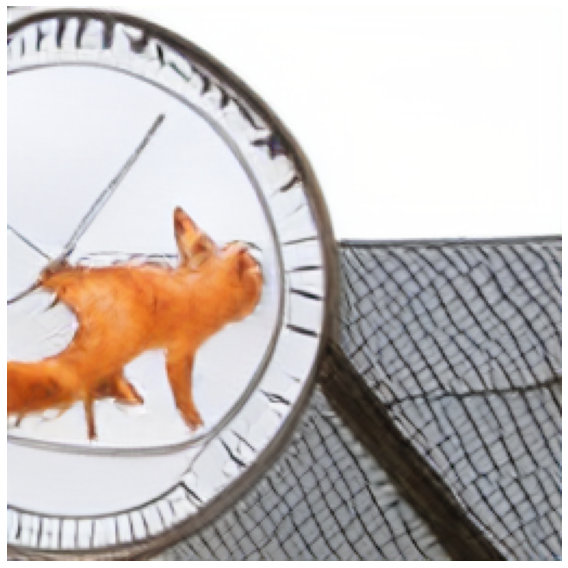

In [24]:
#@markdown #**Run model** 🚀

# output.clear_output()
# plot_output.clear_output()
sampling(prompt=text,
    top_k=top_k,
    softmax_temperature=temp,
    seed=seed,
    num_candidates=256,
    num_samples_for_display=1)

# display(output)
# display(plot_output)